# Mult-GS Classifier with a BDT

### Attempt to classifiy gluon splitting events using a boosted decision tree

### Labels: 0 = noGS, 1 = GSb , 2 = GSbb

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/rohan/research/gs_classifier/output_multigs.csv')
print(df.shape)

(164656, 13)


In [3]:
feats = df.iloc[:,0:12]
y = df.isgs

In [4]:
print(feats.shape)
feats.head(5)

(164656, 12)


,weight,dr_bb,bb_pt,bb_m,jet1_csv,jet1_pt,jet1_eta,jet1_phi,jet2_csv,jet2_pt,jet2_eta,jet2_phi
0,0.068587,0.947933,806.513000,418.969666,0.970258,469.232178,-1.552434,0.988524,0.906826,340.613373,-0.622500,1.172366
1,0.065783,1.710818,345.106720,202.336594,0.993821,47.740227,1.110587,-1.902524,0.958397,346.806488,0.763946,-0.227192
2,0.069150,0.821434,699.727417,307.803986,0.996421,344.196381,0.981522,-0.860860,0.901411,418.045929,1.034307,-0.041124
3,0.069805,1.968648,235.376617,302.447571,0.987000,153.347351,0.517652,0.096551,0.862928,140.702484,-0.972188,1.383389
4,0.068559,1.061551,743.231018,418.841614,0.907696,374.111206,0.631812,1.520363,0.853196,370.016937,-0.425185,1.618583


In [5]:
print(y.shape)
y.head(5)

(164656,)


0    2
1    2
2    0
3    1
4    0
Name: isgs, dtype: int64

In [6]:
## Set up K-folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=3213)

In [ ]:
b

RATE = 0.2, DEPTH = 1, NESTIMATORS = 200
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.585
Mean test accuracy: 0.581


RATE = 0.2, DEPTH = 1, NESTIMATORS = 400
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.587
Mean test accuracy: 0.582


RATE = 0.2, DEPTH = 1, NESTIMATORS = 600
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.588
Mean test accuracy: 0.582


RATE = 0.2, DEPTH = 1, NESTIMATORS = 800
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.588
Mean test accuracy: 0.582


RATE = 0.2, DEPTH = 1, NESTIMATORS = 1000
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.588
Mean test accuracy: 0.581


RATE = 0.2, DEPTH = 2, NESTIMATORS = 200
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.594
Mean test accuracy: 0.585


RATE = 0.2, DEPTH = 2, NESTIMATORS = 400
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.600
Mean test accuracy: 0.585


RATE = 0.2, DEPTH = 2, NESTIMATORS = 600
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.605
Mean test a

In [9]:
## Above running didn't finish. Completing here

bdts = []
for rate in [1]:
    for depth in [3]:
        for estimators in [600, 800, 1000]:
        
            print('RATE = {}, DEPTH = {}, NESTIMATORS = {}').format(rate, depth, estimators)
    
            cm_train = np.zeros((3,3))
            cm_test = np.zeros((3,3))
            for idx, (train, test) in enumerate(kf.split(feats,y)):
                print('Fold {}...').format(idx+1)

                w_train, w_test = feats.weight.iloc[train], feats.weight.iloc[test]
                X_train, X_test = feats.iloc[train,1:12], feats.iloc[test,1:12]
                y_train, y_test = y.iloc[train], y.iloc[test]
    
                bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=estimators, learning_rate=rate)
                bdt.fit(X_tra## Above running didn't finish. Completing here

bdts = []
for rate in [1]:
    for depth in [3]:
        for estimators in [600, 800, 1000]:
        
            print('RATE = {}, DEPTH = {}, NESTIMATORS = {}').format(rate, depth, estimators)
    
            cm_train = np.zeros((3,3))
            cm_test = np.zeros((3,3))
            for idx, (train, test) in enumerate(kf.split(feats,y)):
                print('Fold {}...').format(idx+1)

                w_train, w_test = feats.weight.iloc[train], feats.weight.iloc[test]
                X_train, X_test = feats.iloc[train,1:12], feats.iloc[test,1:12]
                y_train, y_test = y.iloc[train], y.iloc[test]
    
                bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=estimators, learning_rate=rate)
                bdt.fit(X_train, y_train, w_train.values)    
                bdts.append(bdt)
    
                cm_train += confusion_matrix(y_train, bdt.predict(X_train), sample_weight=w_train)
                cm_test += confusion_matrix(y_test, bdt.predict(X_test), sample_weight=w_test)

            print('\nMean train accuracy: {:.3f}').format(cm_train.trace()/cm_train.sum())
            print('Mean test accuracy: {:.3f}').format(cm_test.trace()/cm_test.sum())
            print('\n')
    in, y_train, w_train.values)    
                bdts.append(bdt)
    
                cm_train += confusion_matrix(y_train, bdt.predict(X_train), sample_weight=w_train)
                cm_test += confusion_matrix(y_test, bdt.predict(X_test), sample_weight=w_test)

            print('\nMean train accuracy: {:.3f}').format(cm_train.trace()/cm_train.sum())
            print('Mean test accuracy: {:.3f}').format(cm_test.trace()/cm_test.sum())
            print('\n')
    

RATE = 1, DEPTH = 3, NESTIMATORS = 600
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.647
Mean test accuracy: 0.523


RATE = 1, DEPTH = 3, NESTIMATORS = 800
Fold 1...


KeyboardInterrupt: 

In [10]:
## Above running didn't finish. Completing here

bdts = []
for rate in [1, ]:
    for depth in [3]:
        for estimators in [800, 1000]:
        
            print('RATE = {}, DEPTH = {}, NESTIMATORS = {}').format(rate, depth, estimators)
    
            cm_train = np.zeros((3,3))
            cm_test = np.zeros((3,3))
            for idx, (train, test) in enumerate(kf.split(feats,y)):
                print('Fold {}...').format(idx+1)

                w_train, w_test = feats.weight.iloc[train], feats.weight.iloc[test]
                X_train, X_test = feats.iloc[train,1:12], feats.iloc[test,1:12]
                y_train, y_test = y.iloc[train], y.iloc[test]
    
                bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=estimators, learning_rate=rate)
                bdt.fit(X_train, y_train, w_train.values)    
                bdts.append(bdt)
    
                cm_train += confusion_matrix(y_train, bdt.predict(X_train), sample_weight=w_train)
                cm_test += confusion_matrix(y_test, bdt.predict(X_test), sample_weight=w_test)

            print('\nMean train accuracy: {:.3f}').format(cm_train.trace()/cm_train.sum())
            print('Mean test accuracy: {:.3f}').format(cm_test.trace()/cm_test.sum())
            print('\n')
    

RATE = 1, DEPTH = 3, NESTIMATORS = 800
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.659
Mean test accuracy: 0.516


RATE = 1, DEPTH = 3, NESTIMATORS = 1000
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.670
Mean test accuracy: 0.511




In [20]:
## Try using a smaller learning rate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


for rate in [0.05]:
    for depth in [2,3]:
        for estimators in [200,400,600,800,1000]:
        
            print('RATE = {}, DEPTH = {}, NESTIMATORS = {}').format(rate, depth, estimators)
    
            cm_train = np.zeros((3,3))
            cm_test = np.zeros((3,3))
            for idx, (train, test) in enumerate(kf.split(feats,y)):
                print('Fold {}...').format(idx+1)

                w_train, w_test = feats.weight.iloc[train], feats.weight.iloc[test]
                X_train, X_test = feats.iloc[train,1:12], feats.iloc[test,1:12]
                y_train, y_test = y.iloc[train], y.iloc[test]
    
                bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=estimators, learning_rate=rate)
                bdt.fit(X_train, y_train, w_train.values)    
    
                cm_train += confusion_matrix(y_train, bdt.predict(X_train), sample_weight=w_train)
                cm_test += confusion_matrix(y_test, bdt.predict(X_test), sample_weight=w_test)

            print('\nMean train accuracy: {:.3f}').format(cm_train.trace()/cm_train.sum())
            print('Mean test accuracy: {:.3f}').format(cm_test.trace()/cm_test.sum())
            print('\n')

RATE = 0.05, DEPTH = 2, NESTIMATORS = 200
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.586
Mean test accuracy: 0.583


RATE = 0.05, DEPTH = 2, NESTIMATORS = 400
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.590
Mean test accuracy: 0.585


RATE = 0.05, DEPTH = 2, NESTIMATORS = 600
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.593
Mean test accuracy: 0.586


RATE = 0.05, DEPTH = 2, NESTIMATORS = 800
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.595
Mean test accuracy: 0.586


RATE = 0.05, DEPTH = 2, NESTIMATORS = 1000
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.597
Mean test accuracy: 0.586


RATE = 0.05, DEPTH = 3, NESTIMATORS = 200
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.593
Mean test accuracy: 0.587


RATE = 0.05, DEPTH = 3, NESTIMATORS = 400
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.599
Mean test accuracy: 0.587


RATE = 0.05, DEPTH = 3, NESTIMATORS = 600
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.605
Mea

In [25]:
## Try using a smaller learning rate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


for rate in [0.05, 0.466666666667, 1]:
    for depth in [2]:
        for estimators in [50, 100, 150]:
        
            print('RATE = {}, DEPTH = {}, NESTIMATORS = {}').format(rate, depth, estimators)
    
            cm_train = np.zeros((3,3))
            cm_test = np.zeros((3,3))
            for idx, (train, test) in enumerate(kf.split(feats,y)):
                print('Fold {}...').format(idx+1)

                w_train, w_test = feats.weight.iloc[train], feats.weight.iloc[test]
                X_train, X_test = feats.iloc[train,1:12], feats.iloc[test,1:12]
                y_train, y_test = y.iloc[train], y.iloc[test]
    
                bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=estimators, learning_rate=rate)
                bdt.fit(X_train, y_train, w_train.values)    
    
                cm_train += confusion_matrix(y_train, bdt.predict(X_train), sample_weight=w_train)
                cm_test += confusion_matrix(y_test, bdt.predict(X_test), sample_weight=w_test)

            print('\nMean train accuracy: {:.3f}').format(cm_train.trace()/cm_train.sum())
            print('Mean test accuracy: {:.3f}').format(cm_test.trace()/cm_test.sum())
            print('\n')

RATE = 0.05, DEPTH = 2, NESTIMATORS = 50
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.572
Mean test accuracy: 0.570


RATE = 0.05, DEPTH = 2, NESTIMATORS = 100
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.578
Mean test accuracy: 0.576


RATE = 0.05, DEPTH = 2, NESTIMATORS = 150
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.584
Mean test accuracy: 0.582


RATE = 0.466666666667, DEPTH = 2, NESTIMATORS = 50
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.588
Mean test accuracy: 0.581


RATE = 0.466666666667, DEPTH = 2, NESTIMATORS = 100
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.593
Mean test accuracy: 0.581


RATE = 0.466666666667, DEPTH = 2, NESTIMATORS = 150
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.595
Mean test accuracy: 0.582


RATE = 1, DEPTH = 2, NESTIMATORS = 50
Fold 1...
Fold 2...
Fold 3...

Mean train accuracy: 0.587
Mean test accuracy: 0.577


RATE = 1, DEPTH = 2, NESTIMATORS = 100
Fold 1...
Fold 2...
Fold 3...

Mean train

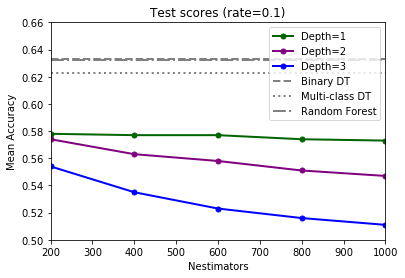

In [23]:
## scores split by nestimators
depth1 = [0.578, 0.577, 0.577, 0.574, 0.573]
depth2 = [0.574, 0.563, 0.558, 0.551, 0.547]
depth3 = [0.554, 0.535, 0.523, 0.516, 0.511]

# Plot train/test scores as a function of depth
plt.plot(range(200,1001,200), depth1, color='darkgreen', label = 'Depth=1', lw=2, marker='.', ms=10)
plt.plot(range(200,1001,200), depth2, color='purple', label = 'Depth=2', lw=2, marker='.', ms=10)
plt.plot(range(200,1001,200), depth3, color='blue', label = 'Depth=3', lw=2, marker='.', ms=10)
plt.plot([200,1000],[0.633,0.633], color='grey', lw = 2, linestyle='--', label='Binary DT')
plt.plot([200,1000],[0.623,0.623], color='grey', lw = 2, linestyle=':', label='Multi-class DT')
plt.plot([200,1000],[0.632,0.632], color='grey', lw = 2, linestyle='-.', label='Random Forest')
plt.xlim([200,1000])
plt.ylim([0.5, 0.66])
plt.title('Test scores (rate=0.1)')
plt.xlabel('Nestimators')
plt.ylabel('Mean Accuracy')
plt.legend(loc='upper right')
plt.show()

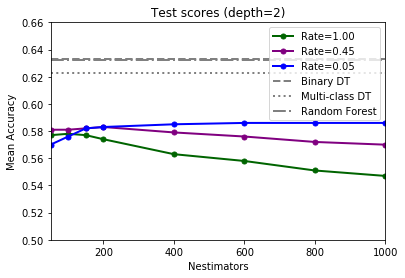

In [26]:
## scores split by nestimators (depth=2)
rate1     = [0.577, 0.578, 0.577, 0.574, 0.563, 0.558, 0.551, 0.547]
ratep45   = [0.581, 0.581, 0.582, 0.583, 0.579, 0.576, 0.572, 0.570]
ratep05   = [0.570, 0.576, 0.582, 0.583, 0.585, 0.586, 0.586, 0.586]

# Plot train/test scores as a function of depth
plt.plot([50,100,150,200,400,600,800,1000], rate1, color='darkgreen', label = 'Rate=1.00', lw=2, marker='.', ms=10)
plt.plot([50,100,150,200,400,600,800,1000], ratep45, color='purple', label = 'Rate=0.45', lw=2, marker='.', ms=10)
plt.plot([50,100,150,200,400,600,800,1000], ratep05, color='blue', label = 'Rate=0.05', lw=2, marker='.', ms=10)
plt.plot([50,1000],[0.633,0.633], color='grey', lw = 2, linestyle='--', label='Binary DT')
plt.plot([50,1000],[0.623,0.623], color='grey', lw = 2, linestyle=':', label='Multi-class DT')
plt.plot([50,1000],[0.632,0.632], color='grey', lw = 2, linestyle='-.', label='Random Forest')
plt.xlim([50,1000])
plt.ylim([0.5, 0.66])
plt.title('Test scores (depth=2)')
plt.xlabel('Nestimators')
plt.ylabel('Mean Accuracy')
plt.legend(loc='upper right')
plt.show()